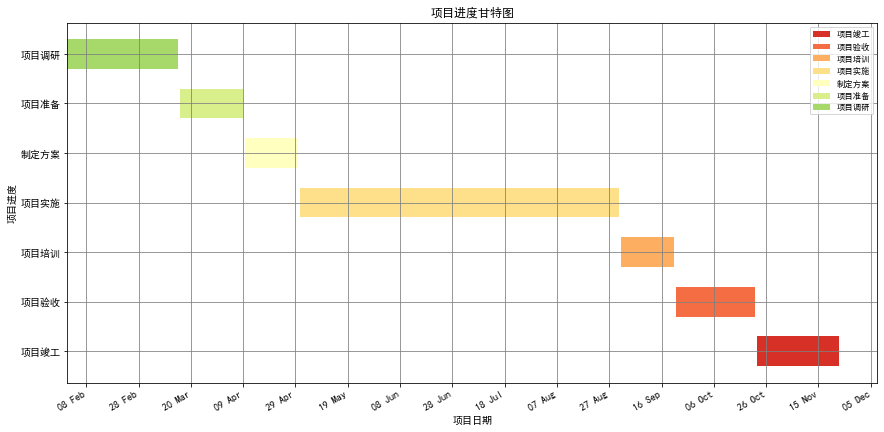

<Figure size 720x720 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-

from datetime import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates
import logging
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

class Gantt(object):
    #颜色色标：参考http://colorbrewer2.org/
    RdYlGr = ['#d73027', '#f46d43', '#fdae61','#fee08b', '#ffffbf', '#d9ef8b','#a6d96a', '#66bd63', '#1a9850']

    POS_START = 1.0
    POS_STEP = 0.5

    def __init__(self, tasks):
        self._fig = plt.figure(figsize=(15,10))
        self._ax = self._fig.add_axes([0.1, 0.1, .75, .5])

        self.tasks = tasks[::-1]

    def _format_date(self, date_string):
        try:
            date = datetime.datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
        except ValueError as err:
            logging.error("String '{0}' can not be converted to datetime object: {1}"
                   .format(date_string, err))
            sys.exit(-1)
        mpl_date = mdates.date2num(date)
        return mpl_date

    def _plot_bars(self):
        i = 0
        for task in self.tasks:
            start = self._format_date(task['start'])
            end = self._format_date(task['end'])
            bottom = (i * Gantt.POS_STEP) + Gantt.POS_START
            width = end - start
            self._ax.barh(bottom, width, left=start, height=0.3,align='center', label=task['label'],color = Gantt.RdYlGr[i])
            i += 1

    def _configure_yaxis(self):
        task_labels = [t['label'] for t in self.tasks]
        pos = self._positions(len(task_labels))
        ylocs = self._ax.set_yticks(pos)
        ylabels = self._ax.set_yticklabels(task_labels)
        plt.setp(ylabels, size='medium')

    def _configure_xaxis(self):
        self._ax.xaxis_date()
        rule = mdates.rrulewrapper(mdates.DAILY, interval=20)
        loc = mdates.RRuleLocator(rule)
        formatter = mdates.DateFormatter("%d %b")

        self._ax.xaxis.set_major_locator(loc)
        self._ax.xaxis.set_major_formatter(formatter)
        xlabels = self._ax.get_xticklabels()
        plt.setp(xlabels, rotation=30, fontsize=10)

    def _configure_figure(self):
        self._configure_xaxis()
        self._configure_yaxis()

        self._ax.grid(True, color='gray')
        self._set_legend()
        self._fig.autofmt_xdate()

    def _set_legend(self):
        font = font_manager.FontProperties(size='small')
        self._ax.legend(loc='upper right', prop=font)

    def _positions(self, count):
        end = count * Gantt.POS_STEP + Gantt.POS_START
        pos = np.arange(Gantt.POS_START, end, Gantt.POS_STEP)
        return pos
    
    def show(self):
        self._plot_bars()
        self._configure_figure()
        plt.show()
        
if __name__ == '__main__':
    TEST_DATA = (
                 { 'label': '项目调研', 'start':'2019-02-01 12:00:00', 'end': '2019-03-15 18:00:00'},
                 { 'label': '项目准备', 'start':'2019-03-16 09:00:00', 'end': '2019-04-09 12:00:00'},
                 { 'label': '制定方案', 'start':'2019-04-10 12:00:00', 'end': '2019-04-30 18:00:00'},
                 { 'label': '项目实施', 'start':'2019-05-01 09:00:00', 'end': '2019-08-31 13:00:00'},
                 { 'label': '项目培训', 'start':'2019-09-01 09:00:00', 'end': '2019-09-21 13:00:00'},
                 { 'label': '项目验收', 'start':'2019-09-22 09:00:00', 'end': '2019-10-22 13:00:00'},
                 { 'label': '项目竣工', 'start':'2019-10-23 09:00:00', 'end': '2019-11-23 13:00:00'},
                )
    
    gantt = Gantt(TEST_DATA)
    plt.xlabel('项目日期')
    plt.ylabel('项目进度')
    plt.title('项目进度甘特图')
    plt.figure(figsize=(10,10))
    gantt.show()